In [1]:
# Comparing my tensorflow implementation of the linear conjugate gradient method to the scipy.
# Since my implementation assumes float32 arrays, the accuracy of the results is going to be quite a bit lower.
# however, the output should be

In [2]:
import numpy as np
from scipy.sparse import linalg
import tensorflow as tf
from sopt.optimizers.tensorflow.utils import MatrixFreeLinearOp, conjugate_gradient
import matplotlib.pyplot as plt

In [3]:
# Creating a linear system.

In [12]:
m = np.random.randn(20, 20)

A = m @ m.T

In [14]:
# Ensuring the matrix is symmetric and positive definite. All eigvals should be positive
np.linalg.eigvals(A)

array([7.47797881e+01, 5.12077591e+01, 4.62080455e+01, 4.20920774e+01,
       3.78565012e+01, 3.40144119e+01, 2.57941481e+01, 1.82179941e+01,
       1.70879276e+01, 1.56093088e+01, 1.19123041e+01, 6.61633792e+00,
       6.44153687e+00, 4.42482911e+00, 3.25540079e+00, 3.47300372e+00,
       1.02586831e+00, 1.15578761e-05, 3.38973642e-01, 4.95814638e-01])

In [4]:
x_true = np.random.randn(20)
y = (A @ x_true[:,None]).reshape(-1)

In [5]:
# Results using scipy
def getScipyErrors(maxiter):
    x_pred = linalg.cg(A, y, maxiter=maxiter)[0]
    errors = x_pred - x_true
    return np.sum(errors**2)

In [6]:
# Using my conjugate gradient method

In [7]:
tf.reset_default_graph()

In [8]:
A_t = tf.constant(A, dtype='float32')
y_t = tf.constant(y, dtype='float32')
x_true_t = tf.constant(x_true, dtype='float32')

In [9]:
matvec = lambda x: tf.reshape(A_t @ x[:, None], [-1])

In [10]:
linop = MatrixFreeLinearOp(operator=matvec, shape=y_t.get_shape())

In [11]:
maxiter = tf.placeholder(tf.int32, shape=[])
x_pred_t = conjugate_gradient(linop, y_t, tol=1e-6, max_iter=maxiter)
errors_t = x_pred_t.x - x_true_t
lsq_errors_t = tf.reduce_sum(errors_t**2)

In [12]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [13]:
lsq_errors_scipy = []
lsq_errors_tf = []
for i in range(1,50):
    lsq_errors_scipy.append(getScipyErrors(i))
    lsq_errors_tf.append(sess.run(lsq_errors_t, feed_dict={maxiter:i}))

In [14]:
# The tensorflow results are less accurate after a point.

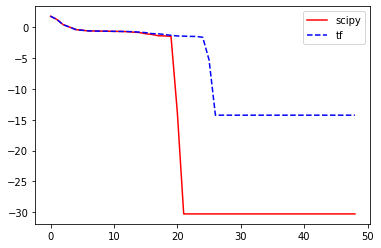

In [15]:
plt.plot(np.log(lsq_errors_scipy), color='red', label='scipy')
plt.plot(np.log(lsq_errors_tf), color='blue', ls='--', label='tf')
plt.legend(loc='best')
plt.show()